## Задача классификации товаров по правильным категориям (Otto)

### Матвей Морозов, cтудент 676 группы ФУПМ МФТИ (кафедра ИППИ)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Загрузка данных 

In [2]:
# Загрузим наш дасет
data = pd.read_csv('train.csv')

In [3]:
# Отобразим первые 5 строчек нашего датасета
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


Проверим наши данные на пропуски, чтобы не было NaNов

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
id         61878 non-null int64
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null i

In [5]:
print (data.describe())

print ('')
print ('Наличие Nan:', data.isnull().values.any())

                 id       feat_1        feat_2        feat_3        feat_4  \
count  61878.000000  61878.00000  61878.000000  61878.000000  61878.000000   
mean   30939.500000      0.38668      0.263066      0.901467      0.779081   
std    17862.784315      1.52533      1.252073      2.934818      2.788005   
min        1.000000      0.00000      0.000000      0.000000      0.000000   
25%    15470.250000      0.00000      0.000000      0.000000      0.000000   
50%    30939.500000      0.00000      0.000000      0.000000      0.000000   
75%    46408.750000      0.00000      0.000000      0.000000      0.000000   
max    61878.000000     61.00000     51.000000     64.000000     70.000000   

             feat_5        feat_6        feat_7        feat_8        feat_9  \
count  61878.000000  61878.000000  61878.000000  61878.000000  61878.000000   
mean       0.071043      0.025696      0.193704      0.662433      1.011296   
std        0.438902      0.215333      1.030102      2.25577

Как мы видим, всё хорошо, пропусков нет

# Визуализация данных

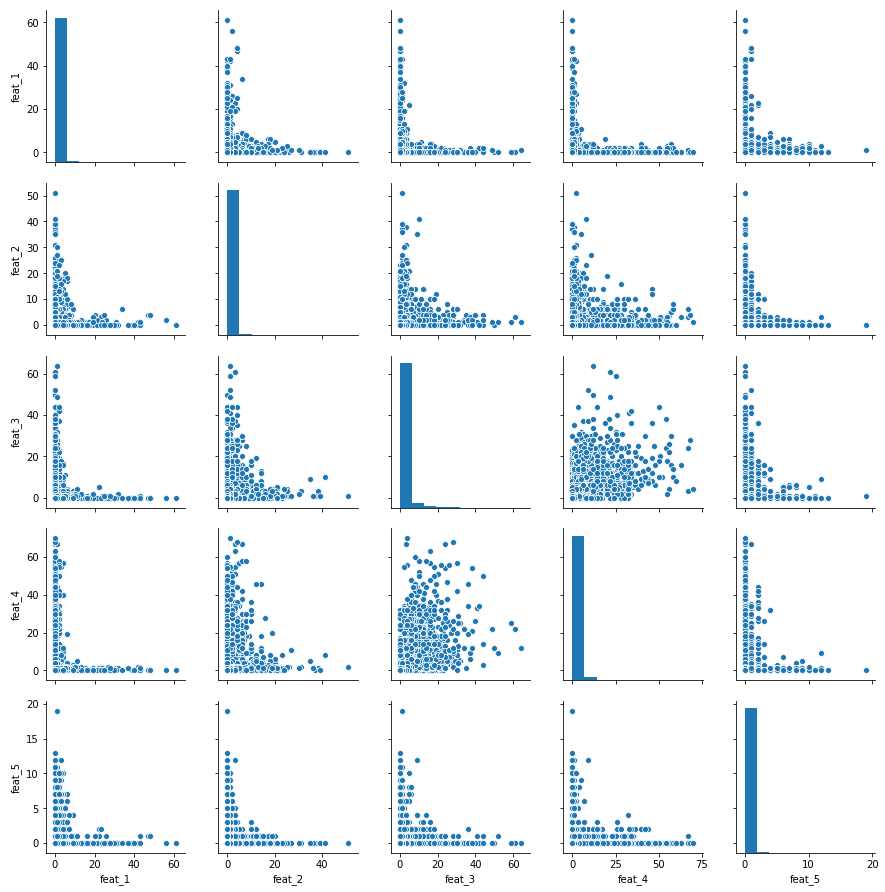

In [6]:
# визуализируем наш датасет, пока отобразим только первые 5 признаков (их всего 91)
cols = ['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5']
sns.pairplot(data[cols])

### Посмотрим, сколько элементов в каждом из классов.

Counter({'Class_2': 16122, 'Class_6': 14135, 'Class_8': 8464, 'Class_3': 8004, 'Class_9': 4955, 'Class_7': 2839, 'Class_5': 2739, 'Class_4': 2691, 'Class_1': 1929})


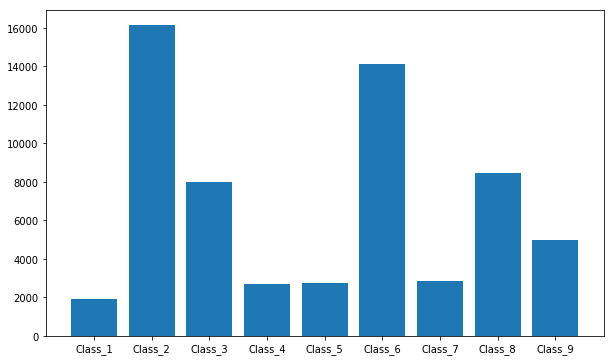

In [7]:
from collections import  Counter

X = data.iloc[:, :-1].values
Y = data.iloc[:, 94].values 

pylab.figure(figsize = (10, 6))
pylab.bar(Counter(Y).keys(), Counter(Y).values())
print (Counter(Y))

Как мы видим, выборка не особо сбалансирована. Например, 1-м классе чуть меньше 2000 элементов, в то время, как во 2-м более, чем 16000.

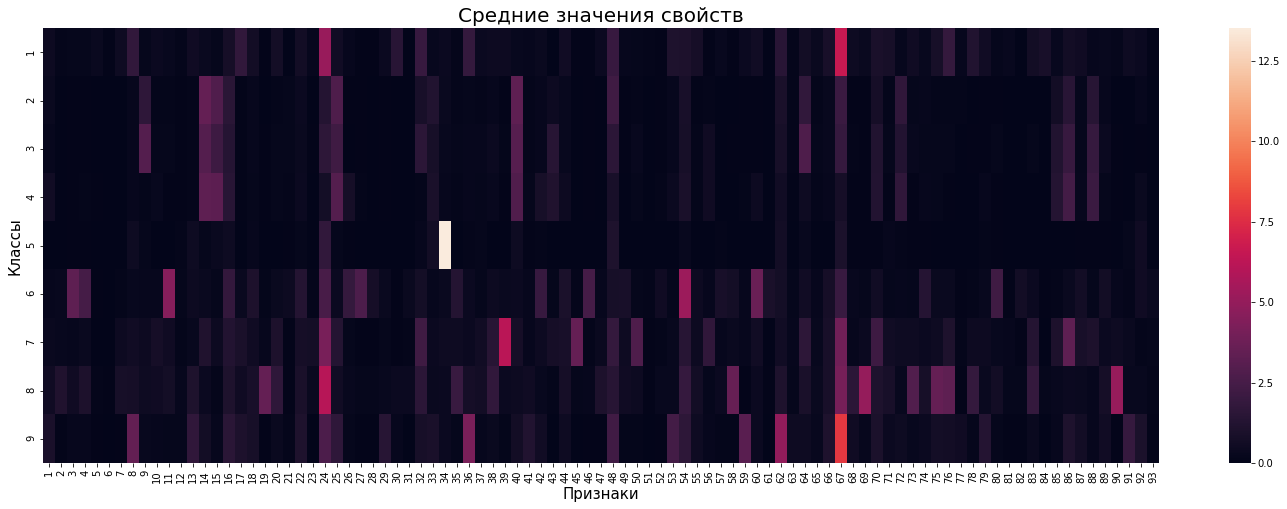

In [8]:
df = data.groupby(['target']).mean()
df = df.drop(columns=['id'])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25,8))
sns.heatmap(df, ax=axes,xticklabels=range(1,94),yticklabels=range(1,10))
axes.set_xlabel('Признаки',fontsize=15)
axes.set_ylabel('Классы',fontsize=15)
axes.set_title('Средние значения свойств',fontsize=20)
plt.show()

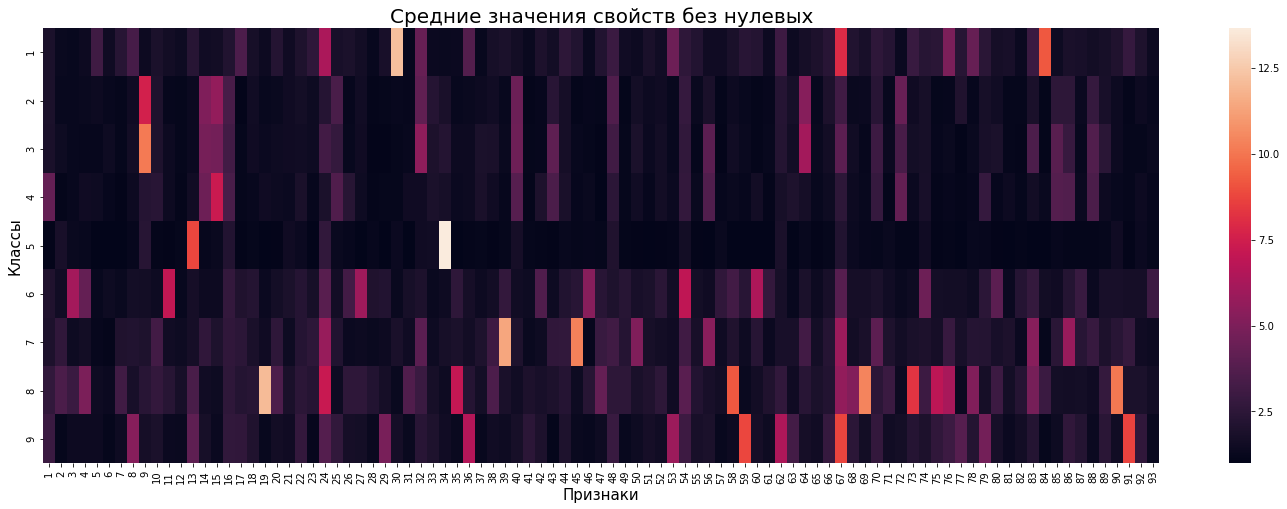

In [34]:
primer = data.replace(0, np.NaN)
primer = primer.groupby(['target']).mean()
primer = primer.drop(columns=['id'])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25,8))
sns.heatmap(primer, ax=axes,xticklabels=range(1,94),yticklabels=range(1,10))
axes.set_xlabel('Признаки',fontsize=15)
axes.set_ylabel('Классы',fontsize=15)
axes.set_title('Средние значения свойств без нулевых',fontsize=20)
plt.show()

### Посмотрим на корреляцию признаков

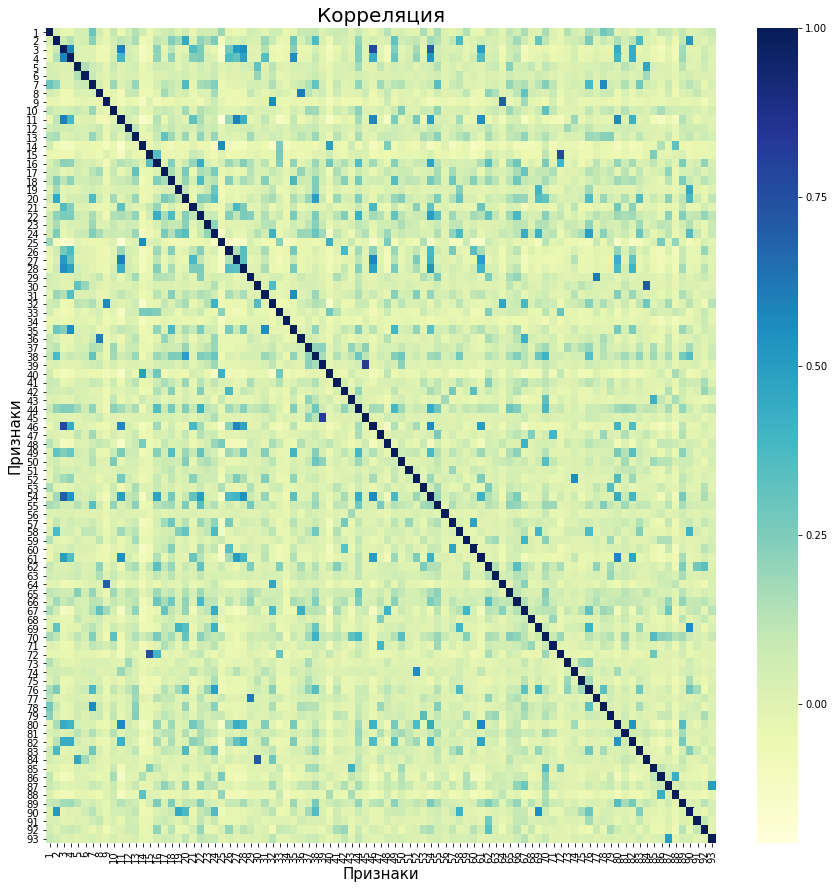

In [10]:
corr = (data.drop(columns = ['target','id'])).corr()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
sns.heatmap(corr, ax=axes,xticklabels=range(1,94),yticklabels=range(1,94),cmap="YlGnBu")
axes.set_xlabel('Признаки',fontsize=15)
axes.set_ylabel('Признаки',fontsize=15)
axes.set_title('Корреляция',fontsize=20)
plt.show()

Признаки не сильно коррелированы, что хорошо.

# Подготовка данных
Подготовим наши данные. Во-первых, разобьемы их на признаковые данные и метки. Во-вторых, отнормируем признаки.

In [11]:
from sklearn import preprocessing

x_train = data.drop(['target','id'], axis=1)
x_train = preprocessing.normalize(x_train) #нормируем признаки
x_train = pd.DataFrame (x_train)
y_train = data.target

# Оценка качества

В качестве оценки качества будем использовать метрику F1 score.

$$F_1 = \frac{2 \cdot (precision \cdot recall)}{(precision + recall)}$$

Отдельно будем рассматривать:

average = 'weighted'

average = 'macro'

average = 'micro'

In [12]:
error = pd.DataFrame(columns=['Name','F1_weight', 'F1_micro', 'F1_macro'])

# KNN

In [13]:
#загрузим необходимые библиотеки для KNN и для оценки качества
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

В кросс-валидации будем использовать 5 Fold'ов. Качество также будем оценивать с помощью кросс-валидации.
Будем смотреть метрику f1. Число соседей возьмём равным 5.

In [14]:
res1 = 0
res2 = 0
res3 = 0

skf = StratifiedKFold(n_splits=5 ,shuffle=True)
for train_index, test_index in skf.split(x_train, y_train):
    X = x_train.iloc[train_index]
    y = y_train.iloc[train_index]
    X_test = x_train.iloc[test_index]
    y_test = y_train.iloc[test_index]
    model = KNeighborsClassifier(n_neighbors = 5)
    model.fit(X, y)
    y_pred = model.predict(X_test)
    res1+=f1_score(y_test,y_pred,average='weighted')
    res2+=f1_score(y_test,y_pred,average='micro')
    res3+=f1_score(y_test,y_pred,average='macro')
    
    
    print(classification_report(y_test,y_pred))

print('Итоговая оценка f1 по кросс-валидации:')
print('f1_weighted = ', res1 / 5)
print('f1_micro = ', res2 / 5)
print('f1_macro = ', res3 / 5)

a = 'KNN'
a = np.append (a, res1 / 5)
a = np.append (a, res2 / 5)
a = np.append (a, res3 / 5)

error.loc[0] = a

              precision    recall  f1-score   support

     Class_1       0.65      0.51      0.57       386
     Class_2       0.69      0.82      0.75      3225
     Class_3       0.52      0.49      0.50      1601
     Class_4       0.64      0.27      0.38       539
     Class_5       0.96      0.95      0.96       548
     Class_6       0.94      0.93      0.94      2827
     Class_7       0.77      0.57      0.65       568
     Class_8       0.90      0.91      0.91      1693
     Class_9       0.83      0.87      0.85       991

   micro avg       0.78      0.78      0.78     12378
   macro avg       0.77      0.70      0.72     12378
weighted avg       0.78      0.78      0.77     12378

              precision    recall  f1-score   support

     Class_1       0.64      0.51      0.57       386
     Class_2       0.69      0.83      0.76      3225
     Class_3       0.53      0.48      0.51      1601
     Class_4       0.66      0.30      0.41       538
     Class_5       0.96 

# Многоклассовый SVM

In [15]:
#загрузим необходимые библиотеки для SVM
from sklearn.svm import SVC

In [16]:
res1 = 0
res2 = 0
res3 = 0

skf = StratifiedKFold(n_splits=5 ,shuffle=True)
for train_index, test_index in skf.split(x_train, y_train):
    X = x_train.iloc[train_index]
    y = y_train.iloc[train_index]
    X_test = x_train.iloc[test_index]
    y_test = y_train.iloc[test_index]
    model = SVC (kernel='rbf')
    model.fit(X, y)
    y_pred = model.predict (X_test)
    res1+=f1_score(y_test,y_pred,average='weighted')
    res2+=f1_score(y_test,y_pred,average='micro')
    res3+=f1_score(y_test,y_pred,average='macro')
    print(classification_report(y_test,y_pred))

print('Итоговая оценка f1 по кросс-валидации:')
print('f1_weighted = ', res1 / 5)
print('f1_micro = ', res2 / 5)
print('f1_macro = ', res3 / 5)

a = 'SVM'
a = np.append (a, res1 / 5)
a = np.append (a, res2 / 5)
a = np.append (a, res3 / 5)

error.loc[1] = a

              precision    recall  f1-score   support

     Class_1       0.66      0.13      0.22       386
     Class_2       0.59      0.95      0.73      3225
     Class_3       0.55      0.10      0.17      1601
     Class_4       0.83      0.01      0.02       539
     Class_5       0.91      0.94      0.93       548
     Class_6       0.92      0.91      0.92      2827
     Class_7       0.76      0.48      0.59       568
     Class_8       0.80      0.91      0.85      1693
     Class_9       0.74      0.87      0.80       991

   micro avg       0.73      0.73      0.73     12378
   macro avg       0.75      0.59      0.58     12378
weighted avg       0.74      0.73      0.68     12378

              precision    recall  f1-score   support

     Class_1       0.63      0.11      0.19       386
     Class_2       0.60      0.96      0.74      3225
     Class_3       0.54      0.09      0.16      1601
     Class_4       1.00      0.01      0.02       538
     Class_5       0.92 

# Градиентный бустинг на решающих деревьях. Реализация: XGBoost

In [17]:
from xgboost import XGBClassifier

In [18]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [19]:
res1 = 0
res2 = 0
res3 = 0

skf = StratifiedKFold(n_splits=5 ,shuffle=True)
for train_index, test_index in skf.split(x_train, y_train):
    X = x_train.iloc[train_index]
    y = y_train.iloc[train_index]
    X_test = x_train.iloc[test_index]
    y_test = y_train.iloc[test_index]
    model = XGBClassifier(max_depth=5)
    model.fit(X, y)
    y_pred = model.predict (X_test)
    res1+=f1_score(y_test,y_pred,average='weighted')
    res2+=f1_score(y_test,y_pred,average='micro')
    res3+=f1_score(y_test,y_pred,average='macro')
    print(classification_report(y_test,y_pred))

print('Итоговая оценка f1 по кросс-валидации:')
print('f1_weighted = ', res1 / 5)
print('f1_micro = ', res2 / 5)
print('f1_macro = ', res3 / 5)

a = 'XGBoost'
a = np.append (a, res1 / 5)
a = np.append (a, res2 / 5)
a = np.append (a, res3 / 5)

error.loc[2] = a

              precision    recall  f1-score   support

     Class_1       0.68      0.42      0.52       386
     Class_2       0.69      0.85      0.77      3225
     Class_3       0.58      0.44      0.50      1601
     Class_4       0.71      0.39      0.50       539
     Class_5       0.97      0.96      0.97       548
     Class_6       0.93      0.94      0.93      2827
     Class_7       0.72      0.58      0.64       568
     Class_8       0.88      0.92      0.90      1693
     Class_9       0.82      0.85      0.83       991

   micro avg       0.79      0.79      0.79     12378
   macro avg       0.78      0.71      0.73     12378
weighted avg       0.78      0.79      0.78     12378

              precision    recall  f1-score   support

     Class_1       0.70      0.42      0.53       386
     Class_2       0.70      0.85      0.77      3225
     Class_3       0.58      0.43      0.50      1601
     Class_4       0.75      0.42      0.54       538
     Class_5       0.97 

# Случайный лес

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
res1 = 0
res2 = 0
res3 = 0

skf = StratifiedKFold(n_splits=5 ,shuffle=True)
for train_index, test_index in skf.split(x_train, y_train):
    X = x_train.iloc[train_index]
    y = y_train.iloc[train_index]
    X_test = x_train.iloc[test_index]
    y_test = y_train.iloc[test_index]
    model = RandomForestClassifier(max_depth=11)
    model.fit(X, y)
    y_pred = model.predict (X_test)
    res1+=f1_score(y_test,y_pred,average='weighted')
    res2+=f1_score(y_test,y_pred,average='micro')
    res3+=f1_score(y_test,y_pred,average='macro')
    print(classification_report(y_test,y_pred))

print('Итоговая оценка f1 по кросс-валидации:')
print('f1_weighted = ', res1 / 5)
print('f1_micro = ', res2 / 5)
print('f1_macro = ', res3 / 5)

a = 'Random Forest'
a = np.append (a, res1 / 5)
a = np.append (a, res2 / 5)
a = np.append (a, res3 / 5)

error.loc[3] = a

              precision    recall  f1-score   support

     Class_1       0.50      0.01      0.02       386
     Class_2       0.60      0.94      0.73      3225
     Class_3       0.61      0.16      0.25      1601
     Class_4       0.72      0.22      0.34       539
     Class_5       0.99      0.91      0.95       548
     Class_6       0.88      0.94      0.91      2827
     Class_7       0.81      0.25      0.38       568
     Class_8       0.75      0.89      0.81      1693
     Class_9       0.75      0.74      0.74       991

   micro avg       0.72      0.72      0.72     12378
   macro avg       0.73      0.56      0.57     12378
weighted avg       0.73      0.72      0.68     12378

              precision    recall  f1-score   support

     Class_1       0.70      0.02      0.04       386
     Class_2       0.59      0.95      0.73      3225
     Class_3       0.60      0.16      0.26      1601
     Class_4       0.82      0.19      0.31       538
     Class_5       0.98 

# Логистическая регрессия

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
res1 = 0
res2 = 0
res3 = 0

skf = StratifiedKFold(n_splits=5 ,shuffle=True)
for train_index, test_index in skf.split(x_train, y_train):
    X = x_train.iloc[train_index]
    y = y_train.iloc[train_index]
    X_test = x_train.iloc[test_index]
    y_test = y_train.iloc[test_index]
    model = LogisticRegression()
    model.fit(X, y)
    y_pred = model.predict (X_test)
    res1+=f1_score(y_test,y_pred,average='weighted')
    res2+=f1_score(y_test,y_pred,average='micro')
    res3+=f1_score(y_test,y_pred,average='macro')
    print(classification_report(y_test,y_pred))

print('Итоговая оценка f1 по кросс-валидации:')
print('f1_weighted = ', res1 / 5)
print('f1_micro = ', res2 / 5)
print('f1_macro = ', res3 / 5)

a = 'Лог регрессия'
a = np.append (a, res1 / 5)
a = np.append (a, res2 / 5)
a = np.append (a, res3 / 5)

error.loc[4] = a

              precision    recall  f1-score   support

     Class_1       0.66      0.32      0.43       386
     Class_2       0.64      0.87      0.73      3225
     Class_3       0.49      0.27      0.35      1601
     Class_4       0.73      0.15      0.25       539
     Class_5       0.92      0.95      0.93       548
     Class_6       0.92      0.93      0.93      2827
     Class_7       0.69      0.59      0.64       568
     Class_8       0.85      0.92      0.88      1693
     Class_9       0.82      0.86      0.84       991

   micro avg       0.75      0.75      0.75     12378
   macro avg       0.75      0.65      0.66     12378
weighted avg       0.75      0.75      0.73     12378

              precision    recall  f1-score   support

     Class_1       0.65      0.32      0.42       386
     Class_2       0.64      0.88      0.74      3225
     Class_3       0.49      0.27      0.35      1601
     Class_4       0.73      0.13      0.22       538
     Class_5       0.94 

# Наивный Байес

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
res1 = 0
res2 = 0
res3 = 0

skf = StratifiedKFold(n_splits=5 ,shuffle=True)
for train_index, test_index in skf.split(x_train, y_train):
    X = x_train.iloc[train_index]
    y = y_train.iloc[train_index]
    X_test = x_train.iloc[test_index]
    y_test = y_train.iloc[test_index]
    model = GaussianNB()
    model.fit(X, y)
    y_pred = model.predict (X_test)
    res1+=f1_score(y_test,y_pred,average='weighted')
    res2+=f1_score(y_test,y_pred,average='micro')
    res3+=f1_score(y_test,y_pred,average='macro')
    print(classification_report(y_test,y_pred))

print('Итоговая оценка f1 по кросс-валидации:')
print('f1_weighted = ', res1 / 5)
print('f1_micro = ', res2 / 5)
print('f1_macro = ', res3 / 5)

a = 'Naive Bayes'
a = np.append (a, res1 / 5)
a = np.append (a, res2 / 5)
a = np.append (a, res3 / 5)

error.loc[5] = a

              precision    recall  f1-score   support

     Class_1       0.31      0.47      0.37       386
     Class_2       0.68      0.73      0.70      3225
     Class_3       0.49      0.34      0.40      1601
     Class_4       0.32      0.47      0.38       539
     Class_5       0.89      0.92      0.91       548
     Class_6       0.92      0.84      0.88      2827
     Class_7       0.48      0.64      0.55       568
     Class_8       0.89      0.76      0.82      1693
     Class_9       0.70      0.82      0.76       991

   micro avg       0.70      0.70      0.70     12378
   macro avg       0.63      0.66      0.64     12378
weighted avg       0.72      0.70      0.70     12378

              precision    recall  f1-score   support

     Class_1       0.26      0.37      0.30       386
     Class_2       0.67      0.72      0.69      3225
     Class_3       0.44      0.28      0.34      1601
     Class_4       0.28      0.45      0.35       538
     Class_5       0.88 

# Вывод

Посмотрим таблицу с ошибками на каждом алгоритме

In [51]:
error

,Name,F1_weight,F1_micro,F1_macro
0,KNN,0.7759721026292181,0.7827985294863067,0.7276992832698365
1,SVM,0.6793836855609408,0.7337826494420996,0.5798486601053938
2,XGBoost,0.7818767601555694,0.7906692016479485,0.7384104365134906
3,Random Forest,0.6702238405627226,0.7186716970300598,0.5637325418405765
4,Лог регрессия,0.731841594479844,0.7553900964623222,0.6663047128564974
5,Naive Bayes,0.6942053095918632,0.6909076967199346,0.6282102158425135


Были протестированы различные популярные алгоритмы.

Как мы видим, самые хорошие результаты (почти 80%) даёт градиентный бустинг и KNN (некоторые ошибки). Но как мне кажется, так как это индустриальная задачка какой-то компании, они явно хотят от нас алгоритмы посложнее, примененных выше.

Ещё я не совсем понимаю, как решить проблему несбалансированности классов.

По поводу F1, не понимал, какой тип ошибки использовать, поэтому получал все три типа.